<a href="https://colab.research.google.com/github/csmaster23/machine_learning_principles/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 0: Loss = 0.6931471805599453
Iteration 100: Loss = 0.22083234636682547
Iteration 200: Loss = 0.16179229091390115
Iteration 300: Loss = 0.13659252025405108
Iteration 400: Loss = 0.12185652311737329
Iteration 500: Loss = 0.11188849576909128
Iteration 600: Loss = 0.10455401949308087
Iteration 700: Loss = 0.09885369778845181
Iteration 800: Loss = 0.09424993059868789
Iteration 900: Loss = 0.09042458332331829


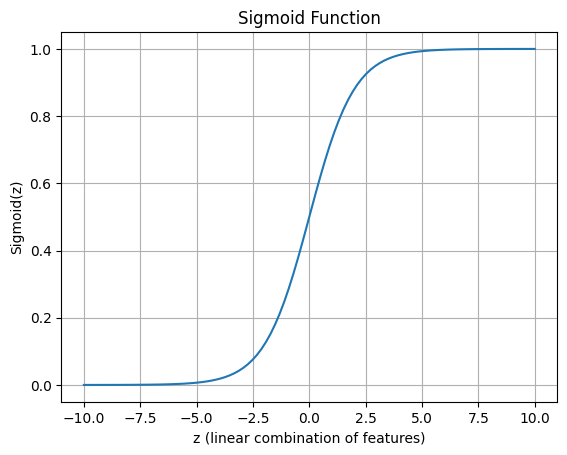

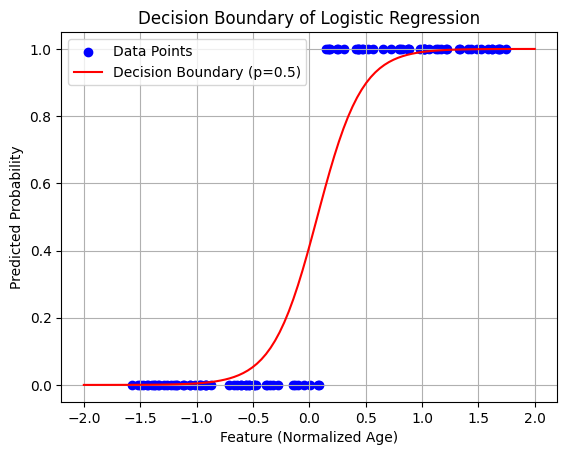

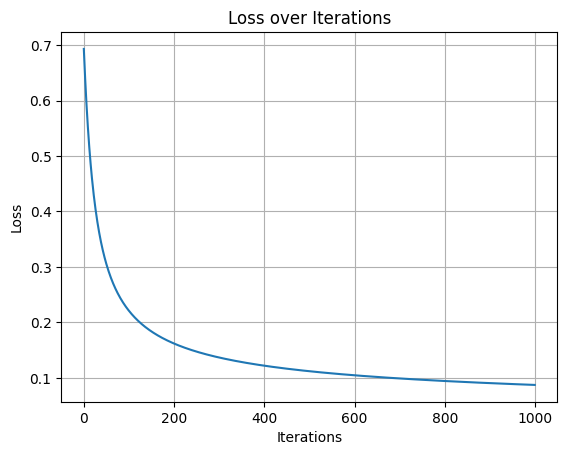

Training Accuracy: 98.00%


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 2. Initialize weights and biases
def initialize_parameters(n_features):
    W = np.zeros(n_features)
    b = 0
    return W, b

# 3. Compute the loss (Binary cross-entropy loss)
def compute_loss(y_true, y_pred):
    m = len(y_true)
    loss = -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

# 4. Forward propagation
def forward_propagation(X, W, b):
    z = np.dot(X, W) + b
    y_pred = sigmoid(z)
    return y_pred

# 5. Backward propagation (Gradient calculation)
def backward_propagation(X, y_true, y_pred):
    m = X.shape[0]
    dw = 1/m * np.dot(X.T, (y_pred - y_true))
    db = 1/m * np.sum(y_pred - y_true)
    return dw, db

# 6. Gradient descent to update parameters
def update_parameters(W, b, dw, db, learning_rate):
    W -= learning_rate * dw
    b -= learning_rate * db
    return W, b

# 7. Logistic regression training
def train_logistic_regression(X, y, learning_rate=0.01, num_iterations=1000):
    n_features = X.shape[1]
    W, b = initialize_parameters(n_features)
    losses, weights_history = [], []

    for i in range(num_iterations):
        y_pred = forward_propagation(X, W, b)
        loss = compute_loss(y, y_pred)
        losses.append(loss)

        weights_history.append(W.copy())  # Track weights at this iteration
        dw, db = backward_propagation(X, y, y_pred)
        W, b = update_parameters(W, b, dw, db, learning_rate)

        if i % 100 == 0:
            print(f"Iteration {i}: Loss = {loss}")

    return W, b, losses, weights_history

# 8. Prediction
def predict(X, W, b):
    y_pred = forward_propagation(X, W, b)
    return [1 if i > 0.5 else 0 for i in y_pred]

def plot_sigmoid():
    z = np.linspace(-10, 10, 100)
    plt.plot(z, sigmoid(z))
    plt.xlabel("z (linear combination of features)")
    plt.ylabel("Sigmoid(z)")
    plt.title("Sigmoid Function")
    plt.grid(True)
    plt.show()

def plot_decision_boundary(X, y, W, b):
    plt.scatter(X, y, color='blue', label='Data Points')
    # Plot the decision boundary where y = 0.5 (logit(z) = 0)
    x_boundary = np.linspace(-2, 2, 100)
    y_boundary = sigmoid(W[0] * x_boundary + b)
    plt.plot(x_boundary, y_boundary, color='red', label='Decision Boundary (p=0.5)')
    plt.xlabel("Feature (Normalized Age)")
    plt.ylabel("Predicted Probability")
    plt.title("Decision Boundary of Logistic Regression")
    plt.legend()
    plt.grid(True)
    plt.show()


# Create a toy dataset (Age vs Buy/Not Buy) (same as before)
np.random.seed(42)
X_toy = np.random.rand(100, 1) * 10  # Age between 0 and 10
y_toy = np.array([1 if x > 5 else 0 for x in X_toy])

# Normalize the dataset
X_toy = (X_toy - np.mean(X_toy)) / np.std(X_toy)

# Train the logistic regression model (same as before)
W, b, losses, weights_history = train_logistic_regression(X_toy, y_toy, learning_rate=0.1, num_iterations=1000)

# 4. Visualization: Plot sigmoid function
plot_sigmoid()

# 5. Visualization: Plot decision boundary
plot_decision_boundary(X_toy, y_toy, W, b)

# 6. Plot the loss over iterations (already included in previous code)
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss over Iterations")
plt.grid(True)
plt.show()

# Visualization: Plot weights over iterations
def plot_weights(weights_history):
    weights_history = np.array(weights_history)
    print(weights_history.shape)
    plt.plot(weights_history)
    plt.xlabel("Iterations")
    plt.ylabel("Weights")
    plt.title("Weights over Iterations")
    plt.legend([f'Weight {i}' for i in range(weights_history.shape[1])])
    plt.grid(True)
    plt.show()
# plot_weights(weights_history)


# Predict on the training set and print accuracy (same as before)
predictions = predict(X_toy, W, b)
accuracy = np.mean(predictions == y_toy) * 100
print(f"Training Accuracy: {accuracy:.2f}%")

In [ ]:
'''
Assumptions of Logistic Regression:

Linearity of the Log-Odds: Logistic Regression assumes a linear relationship between the log-odds of the dependent variable and the independent variables. Deviations from linearity can impact the model’s accuracy.
Independence of Observations: Each observation should be independent of others. In scenarios like time-series data, where observations may be correlated, violating this assumption can affect the model’s reliability.
Absence of Multicollinearity: The assumption of no multicollinearity suggests that predictor variables should not be highly correlated. High multicollinearity can make it challenging to assess the individual impact of each variable.
No Outliers: Outliers can disproportionately influence the model, affecting coefficients and potentially leading to erroneous conclusions. Robust techniques or data transformations may be necessary to mitigate their impact.
Binary or Ordinal Dependent Variable: Logistic Regression is designed for binary or ordinal outcomes. Attempting to apply it to non-binary problems can yield inaccurate results.



Limitations of Logistic Regression:

Linear Decision Boundary: The linear decision boundary may limit Logistic Regression in capturing complex relationships in the data. Non-linear relationships may require more sophisticated models.
Sensitive to Outliers: While outliers impact many models, Logistic Regression can be particularly sensitive. Extreme values can skew the coefficients and influence predictions disproportionately.
Impact of Irrelevant Variables: Including irrelevant variables can lead to overfitting and decrease model interpretability. Feature selection becomes crucial to maintain model efficiency.
Assumption of Independence: While independence is assumed, achieving it in real-world data can be challenging. Time series or spatial data may violate this assumption.
'''